In [1]:
# Random Undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('soundflow_churn.csv')
df.head()

X = df[['antiguedad_dias','dias_activo_ult_30','minutos_escucha_prom_dia','fallos_pago_ult_60','renovacion_automatica','dias_desde_ultimo_login']].values
y = df['es_churn'].values

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, random_state=42, stratify=y
)

# ================================================
# Tomek Links
from imblearn.under_sampling import TomekLinks, ClusterCentroids
tl = TomekLinks()
X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)

# Ver el nuevo balance
print("TomekLinks")
print(f'Antes: {Counter(y_train)}')
print(f'Después: {Counter(y_resampled_tl)}')

cc = ClusterCentroids()
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

print("ClusterCentroids")
print(f'Antes: {Counter(y_train)}')
print(f'Después: {Counter(y_resampled_cc)}')


TomekLinks
Antes: Counter({np.int64(0): 32200, np.int64(1): 2800})
Después: Counter({np.int64(0): 31474, np.int64(1): 2800})
ClusterCentroids
Antes: Counter({np.int64(0): 32200, np.int64(1): 2800})
Después: Counter({np.int64(0): 2800, np.int64(1): 2800})


In [5]:
from matplotlib import pyplot as plt
import numpy as np

FEAT_X = ['antiguedad_dias','dias_activo_ult_30','minutos_escucha_prom_dia','fallos_pago_ult_60','renovacion_automatica','dias_desde_ultimo_login']
FEAT_Y = 'es_churn'

def plot_decision_regions_2d(model, X, y, title='Decision regions'):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', alpha=0.85)
    plt.xlabel(FEAT_X); plt.ylabel(FEAT_Y); plt.title(title)
    plt.tight_layout(); plt.show()

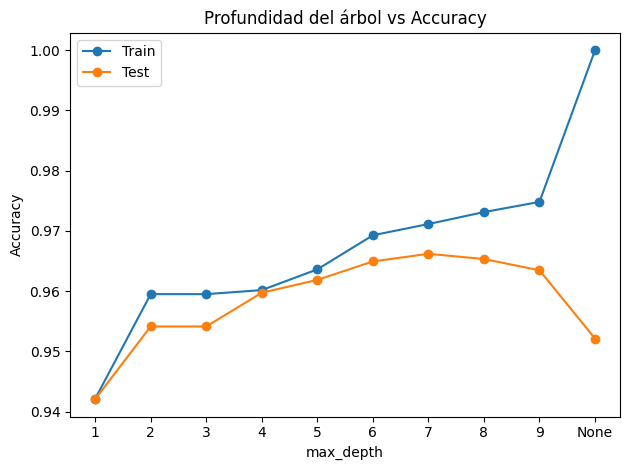

In [22]:
from sklearn.tree import DecisionTreeClassifier


depths = [1,2,3,4,5,6,7,8,9,None]
train_scores, test_scores = [], []

for d in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=d)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_resampled_tl, y_resampled_tl))
    test_scores.append(clf.score(X_test, y_test))

x_labels = [str(d) if d is not None else 'None' for d in depths]

plt.figure()
plt.plot(range(len(depths)), train_scores, marker='o', label='Train')
plt.plot(range(len(depths)), test_scores, marker='o', label='Test')
plt.xticks(range(len(depths)), x_labels)
plt.xlabel('max_depth'); plt.ylabel('Accuracy')
plt.title('Profundidad del árbol vs Accuracy'); plt.legend(); plt.tight_layout(); plt.show()


In [23]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42, max_depth=6)
tree.fit(X_resampled_tl, y_resampled_tl)

y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, digits=2, target_names=['churn','no churn']))

              precision    recall  f1-score   support

       churn       0.98      0.98      0.98     13800
    no churn       0.80      0.74      0.77      1200

    accuracy                           0.96     15000
   macro avg       0.89      0.86      0.88     15000
weighted avg       0.96      0.96      0.96     15000

